In [1]:
from pycalphad import Database, Model, variables as v
from pycalphad import equilibrium
import numpy as np

In [2]:
from pycalphad.tests.datasets import *
dbf = Database(ISSUE43_TDB)

In [3]:
eq2 = equilibrium(dbf, ['AL', 'NI', 'CR', 'VA'], ['FCC_A1', 'GAMMA_PRIME'],
                 {v.X('CR'): 0.6, v.MU('AL'): -140000, #-135620.9960449,
                  v.T: 1273, v.P: 1e5}, verbose=True)
print(eq2)

Components: AL CR NI VA
Phases: build_callables [N, P, T]
FCC_A1 
GAMMA_PRIME 
[done]
build_callables [N, P, T]
('included_composition_indices', array([ 1, -1], dtype=int32))
('best_guess_simplex', array([1, 2], dtype=int32))
('trial_simplices', array([[1, 2],
       [1, 2]], dtype=int32))
trial_matrix[0, 0, 0] = compositions[1, 1] = 1.0
trial_matrix[0, 1, 0] = compositions[2, 1] = 0.0
trial_matrix[1, 0, 0] = 1
trial_matrix[1, 1, 0] = 1
trial_matrix[0, 0, 1] = compositions[1, 1] = 1.0
trial_matrix[0, 1, 1] = compositions[2, 1] = 0.0
trial_matrix[1, 0, 1] = 1
trial_matrix[1, 1, 1] = 1
('f_contig_trial', array([[ 1.,  0.],
       [ 1.,  1.]]))
('rhs', array([ 0.6,  1. ]))
('fractions', array([ 0.6,  0.4]))
('f_contig_trial', array([[ 1.,  0.],
       [ 1.,  1.]]))
('rhs', array([ 0.6,  1. ]))
('fractions', array([ 0.6,  0.4]))
('candidate_tieline', array([[ 1.,  0.],
       [ 0.,  1.]]))
('rhs', array([  1.00000000e+10,   1.00000000e+10]))
('candidate_potentials', array([  1.00000000e+10

Trying to improve poor solution
Chemical Potentials [-139999.99999958  -45174.52939408  -84414.81414246]
[  5.00000000e-13   5.00000000e-18   3.92772977e-16   2.73032653e-12
   8.79023996e-10   6.12517725e-13   5.00016106e-13   3.45518432e-08
   2.81860903e-08   1.09117116e-12   9.28482169e-10   9.23807615e-13
   5.00000000e-13   5.42080249e-12   8.33331668e-13   1.62463447e-12
   5.00000000e-13   9.81047792e+03   8.40102558e+03   5.00001500e-13]
[  1.00000000e+00   1.00000000e+05   1.27300000e+03   1.83128280e-01
   5.68812685e-04   8.16302907e-01   9.99967790e-01   1.44710080e-05
   1.77392467e-05   4.58223255e-01   5.38513302e-04   5.41238231e-01
   1.00000000e+00   9.22372658e-02   6.00001199e-01   3.07761535e-01
   1.00000000e+00   1.00000000e-06   1.00000000e-06   9.99998000e-01]
Status: 0 b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Adding CompositionSet(FCC_A1, [ 0.19099975  0.31723002  0.4

Trying to improve poor solution
Chemical Potentials [-140000.00000059  -44713.40737373  -82793.1749786 ]
[  5.00000000e-13   5.00000000e-18   3.92772977e-16   1.09117116e-12
   9.28481932e-10   9.23807616e-13   5.00000000e-13   5.67575280e-12
   8.33331668e-13   1.60305344e-12   5.00000000e-13   1.09117116e-12
   9.28481931e-10   9.23807616e-13   5.00000000e-13   8.32344741e+03
   5.00001500e-13   8.32344741e+03]
[  1.00000000e+00   1.00000000e+05   1.27300000e+03   4.58223255e-01
   5.38513441e-04   5.41238231e-01   1.00000000e+00   8.80940410e-02
   6.00001199e-01   3.11904760e-01   1.00000000e+00   4.58223255e-01
   5.38513441e-04   5.41238231e-01   1.00000000e+00   1.00000000e-06
   9.99998000e-01   1.00000000e-06]
Status: 0 b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Adding CompositionSet(FCC_A1, [ 0.19099975  0.31723002  0.49177023], NP=0.25, GM=-86037.11596388431) Driving force: 4397.497297

build_callables [P, T]
build_callables [P, T]


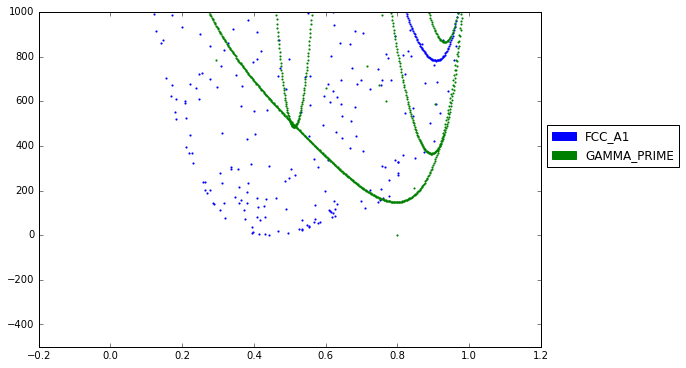

In [22]:
%matplotlib inline
from pycalphad import calculate, Database
from pycalphad.plot.utils import phase_legend
import numpy as np
from pycalphad.tests.datasets import ISSUE43_TDB
import matplotlib.pyplot as plt

my_phases =  ['FCC_A1', 'GAMMA_PRIME']

legend_handles, colorlist = phase_legend(my_phases)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
for name in my_phases:
    result = calculate(dbf, ['AL', 'NI', 'CR', 'VA'], name,
                     T=1273, P=101325, pdens=500)
    gm = result.GM.isel(T=0,P=0) - np.sum([-140000, -47243.21708006, -90400.16978886] * result.X.isel(T=0,P=0), axis=1)
    ax.scatter(result.X.isel(T=0,P=0).sel(component='CR'), gm,
               marker='.', s=5, color=colorlist[name.upper()])
#ax.set_xlim((0.6, 1))
ax.set_ylim((-500, 1000))
#plt.plot([0,1], [0, 0])
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))
plt.show()